# Data Analysis in ROOT C++

Root is extremely useful for graphing and analyzing data. In this tutorial, you will learn how to graph data from a data tree in a multitude of ways. 

### Getting Started in Root

First, begin by downloading the data tree. Ignore the warnings

In [1]:
TFile * f = new TFile("/group/halla/www/hallaweb/html/users/camsonne/SULI/nps_hms_coin_6827_0_1_-1.root");

Warning in <TClass::Init>: no dictionary for class THcRunParameters is available
Warning in <TClass::Init>: no dictionary for class THaRunParameters is available
Warning in <TClass::Init>: no dictionary for class THaEvent is available
Warning in <TClass::Init>: no dictionary for class THaEventHeader is available
Warning in <TClass::Init>: no dictionary for class Podd::MultiFileRun is available
Warning in <TClass::Init>: no dictionary for class THaRun is available
Warning in <TClass::Init>: no dictionary for class THaCodaRun is available
Warning in <TClass::Init>: no dictionary for class THaRunBase is available
Warning in <TClass::Init>: no dictionary for class DAQInfoExtra is available
Warning in <TClass::Init>: no dictionary for class DAQconfig is available
Warning in <TClass::Init>: no dictionary for class Podd::MultiFileRun::StreamInfo is available
Warning in <TClass::Init>: no dictionary for class Podd::MultiFileRun::FileInfo is available


In ROOT, the variable is declared after the asterisks symbol(*). But to pull the data, use <code>T</code>. 

In [ ]:
T->Print();

Running the print function will print the entire tree. To avoid this you can have it print specific branches by using the asterisks symbol(*). 

For example <code>T->Print("*NPS");</code> will print out all the branches that contain NPS. 

If you want it to print the clusters also, you can insert more specific locations within the tree

In [2]:
T->Print("*NPS*clus*");

******************************************************************************
*Tree    :T         : Hall A Analyzer Output DST                             *
*Entries :   165741 : Total =    103284539128 bytes  File  Size = 17254479775 *
*        :          : Tree compression factor =   5.99                       *
******************************************************************************
*Br    0 :Ndata.NPS.cal.clusE : Ndata.NPS.cal.clusE/I                        *
*Entries :   165741 : Total  Size=     721005 bytes  File Size  =     253217 *
*Baskets :      560 : Basket Size=       8704 bytes  Compression=   2.80     *
*............................................................................*
*Br    1 :NPS.cal.clusE : NPS.cal.clusE[Ndata.NPS.cal.clusE]/D               *
*Entries :   165741 : Total  Size=   39296978 bytes  File Size  =   26262789 *
*Baskets :      562 : Basket Size=     504832 bytes  Compression=   1.50     *
*..................................................

### Learning the Directory

You can find the full directory of variable names <a title="here" href="https://sbs.jlab.org/wiki/index.php/SBS_Replay_Variable_Names">here</a>. This allows you to know how to access each of the branches in the data tree. For now, here are some basic ones that are commonly used. 

#### Neutral PArticle Spectrometer

The Neutral Particle Spectrometer's branch: <code>NPS</code> <br>
Calorimeter: <code>cal</code> <br>
Cluster: <code>clu</code> <br>
Number of custers: <code>nclust</code> <br>

#### Accessing the energy

energy (MeV) of largest cluster: <code>E</code> <br>
x-position (mm) of largest cluster: <code>X</code> <br>
y-position (mm) of largest cluster: <code>Y</code>

You need to first specify which spectrometer you want to access, then the module, then what energy output you want to access. <br>
It is like a hierarchy and they will be divided by a period. <br>
For example <code>NPS.cal.clusX</code> or <code>NPS.cal.clusY</code>.

### Making 1D Histograms

To make a basic histogram, you need to enter what data you want it to draw inside and then draw a canvas. If you don't create a canvas manually it will create a canvas labeled c1

In [3]:
f->Draw("NPS.cal.clusX");

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


If you use the <code>c1</code> canvas everytime, ROOT will overwrite the canvas and your previous canvas is deleted. To prevent this, you can create a new one with a unique name each time. 

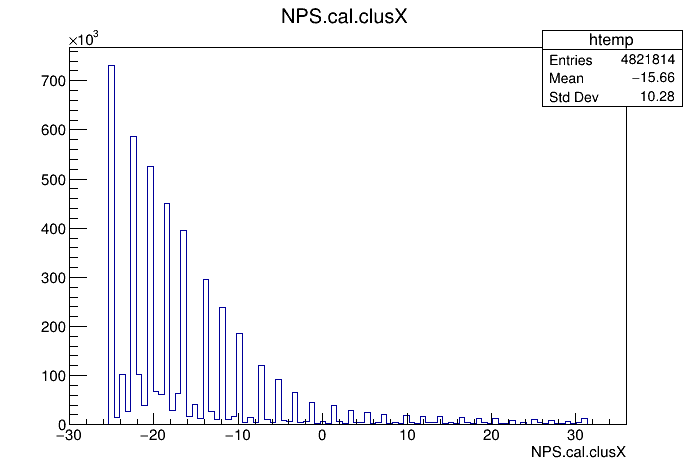

In [4]:
c1->Draw();

In [37]:
auto canvas1 = new TCanvas("canvas1", "Graph", 800,600);

Now, <code>canvas1</code> is the name of your new canvas. You must, however, do this before you draw the graph. 

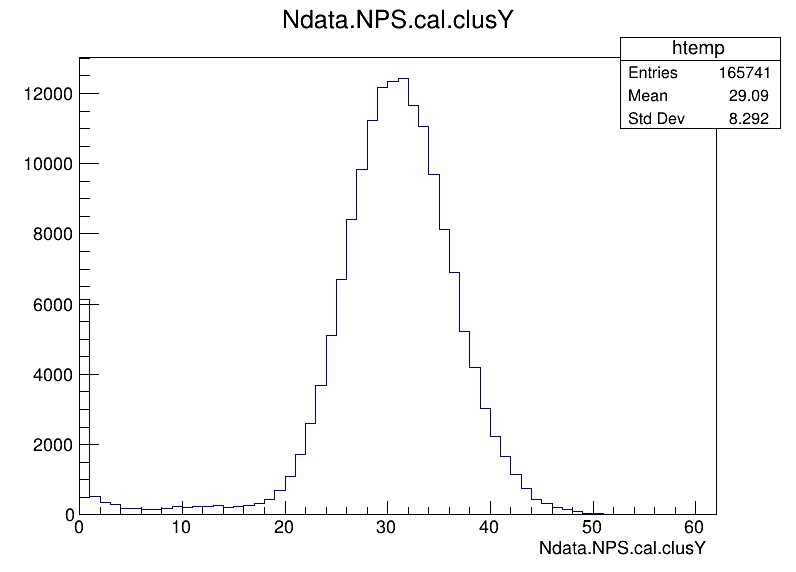

In [60]:
T->Draw("NPS.cal.clusY");
canvas1->Draw();

### Making 2D Graphs

With 2D, you can graph two things at once and look at the relationship. The two variables should be seperated by a colon (:). The first one is what will be the y-axis and the one after the colon is the x-axis. 

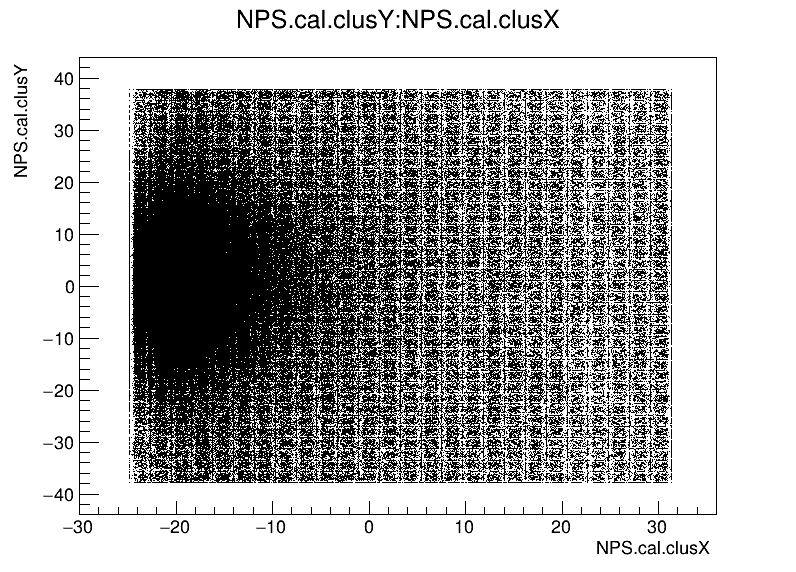

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [42]:
auto c = new TCanvas("c", "Graph", 800,600);
T->Draw("NPS.cal.clusY:NPS.cal.clusX");
c->Draw();

As you can see, this creates a black and white graph. You can create a colored version with the code below. After you declare what variables you want to see, leave an empty quotation, and then the final section should have <code>"colz"</code>, which allows the graph to be in color. 

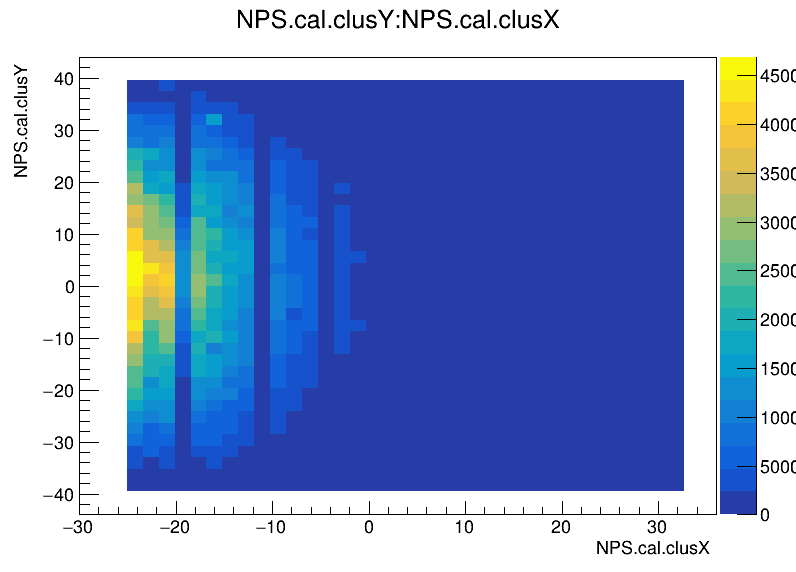

In [43]:
T->Draw("NPS.cal.clusY:NPS.cal.clusX", "", "colz");
c->Draw();

#### Different color palattes

Replacing <code>colz</code> with <code>lego</code> Creates a 3D graph with blocks with height depending on the overlapping frequencies. <code>lego</code> also has multiple styles such as <code>lego1</code>, <code>lego2</code>, and <code>lego3</code>. <br>
You can also use <code>surf</code>, which has up to 7 different styles. You can access them by replacing <code>colz</code> with <code>surf1</code>,<code>surf2</code>, <code>surf3</code>,...

### Making 3D Graphs

Creating a 3D graph is similar to a 2D graph, all you need is a third variable. 

In [44]:
auto canvas2 = new TCanvas("canvas2", "3D Graph", 800,600);
T->Draw("NPS.cal.clusY:NPS.cal.clusX:Ndata.NPS.cal.clusZ");


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas2


The only different with a 3D graph is that the first section is the z-axis. In this case, we are graphing the energy as the z-axis. The x and y axis can be interchanged as it depends on the orientation in which you are looking at the graph

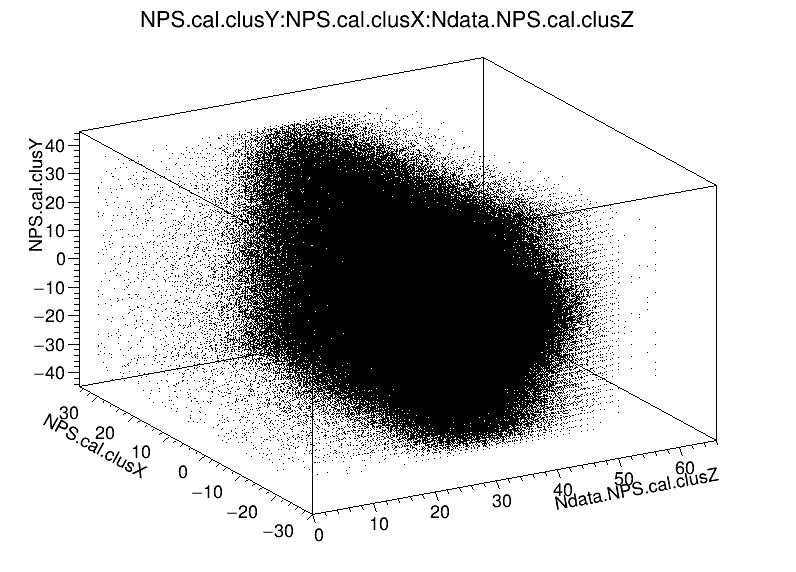

In [45]:
canvas2->Draw();

#### 3D Graph with color

To make a 3D graph, it is the same as with a 2D graph. You can use the same palattes. The only difference is that you are drawing three things at the same time. 

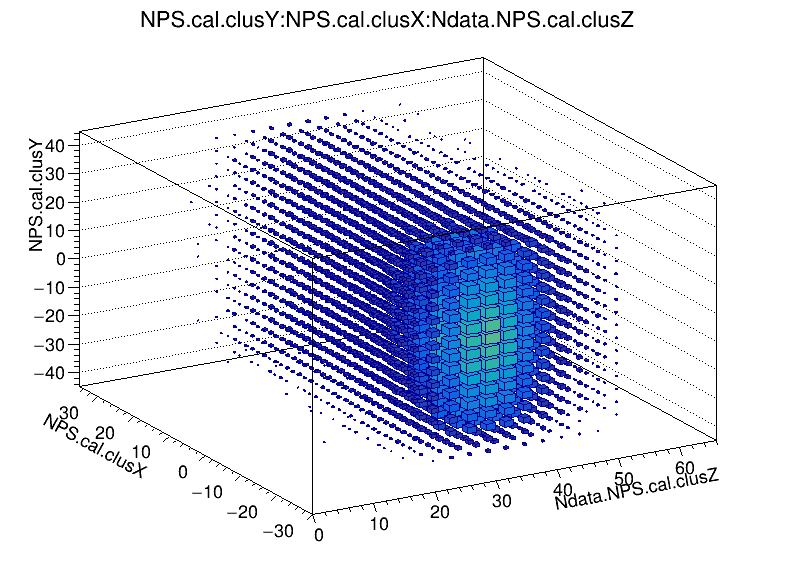

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas2


In [8]:
auto canvas2 = new TCanvas("canvas2", "Graph", 800,600);
T->Draw("NPS.cal.clusY:NPS.cal.clusX:Ndata.NPS.cal.clusZ","", "lego2");
canvas2->Draw();

With this graph, it looks like 2D but the color is what makes it 3D. The color represents the higher energy points. 

### Histograms with Cuts

To make cuts in the data, especially to get rid of noise, you can add a section that specifies the cuts you need 

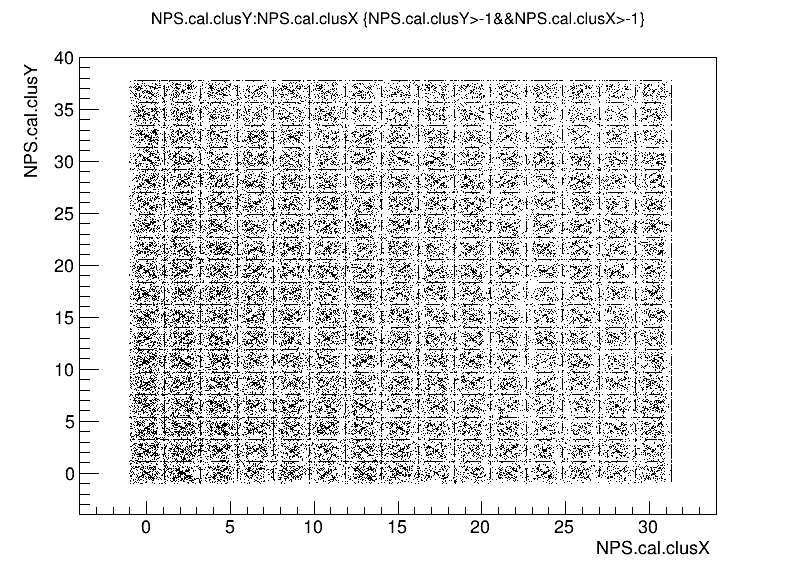

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas3


In [54]:
auto canvas3 = new TCanvas("canvas3", "Graph", 800,600);
T->Draw("NPS.cal.clusY:NPS.cal.clusX","NPS.cal.clusY>-1&&NPS.cal.clusX>-1");
canvas3->Draw();

### Seeing Cluster Size and Energy

IncrementalExecutor::executeFunction: symbol '_ZN5cling7runtime8internal9EvaluateTIvEET_PNS1_15DynamicExprInfoEPN5clang11DeclContextE' unresolved while linking [cling interface function]!
You are probably missing the definition of void cling::runtime::internal::EvaluateT<void>(cling::runtime::internal::DynamicExprInfo*, clang::DeclContext*)
Maybe you need to load the corresponding shared library?
